<a href="https://colab.research.google.com/github/swilsonmfc/pandas/blob/main/5_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution 5

![](https://www.dadcooksdinner.com/wp-content/uploads/2017/09/DadCooksDinner_TipJar.png)

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Questions
* Is there a difference between Male & Female tipping patterns?
* How does day of week and time affect tips?
* What factor visually seems to be most important to tipping?

# Overall

In [ ]:
df.shape

(244, 7)

## Missing

In [ ]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Data Types

In [ ]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

# Bill & Tip
* Tips increase as bills get larger
* Using a ratio would be good

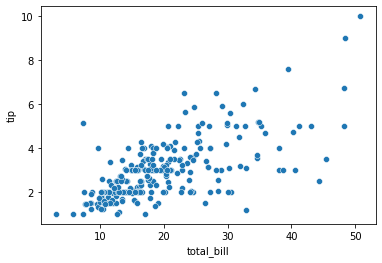

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df);

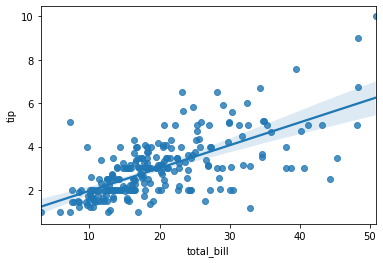

In [ ]:
sns.regplot(x='total_bill', y='tip', data=df);

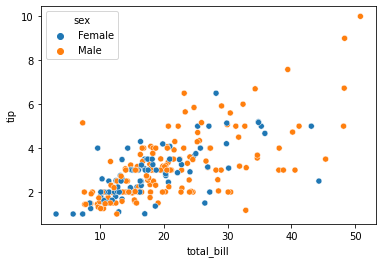

In [ ]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df);

# Tip Ratio

In [ ]:
df['tip_ratio'] = df.tip * 100. / df.total_bill

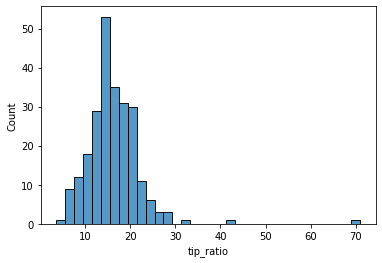

In [ ]:
sns.histplot(df.tip_ratio);

## Total Bill & Ratio
* As the bill increases, the ratio to tip lowers

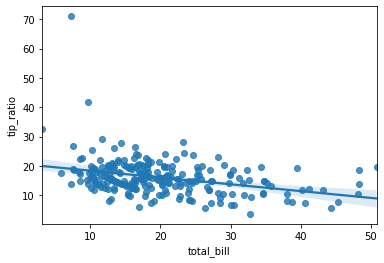

In [ ]:
sns.regplot(x='total_bill', y='tip_ratio', data=df);

## Largest / Smallest Tips

In [ ]:
df.sort_values('tip_ratio', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,tip_ratio
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


In [ ]:
df.sort_values('tip_ratio', ascending=False).tail()

,total_bill,tip,sex,smoker,day,time,size,tip_ratio
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.565988
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
57,26.41,1.50,Female,No,Sat,Dinner,2,5.679667
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341
237,32.83,1.17,Male,Yes,Sat,Dinner,2,3.563814


# Univariate

## Male / Female
* Males slightly lower tippers

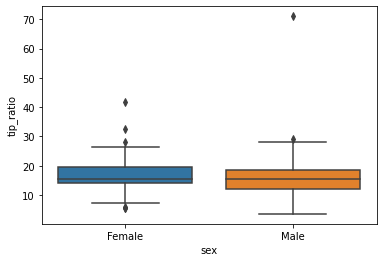

In [ ]:
sns.boxplot(x='sex', y='tip_ratio', data=df)

## Smoker

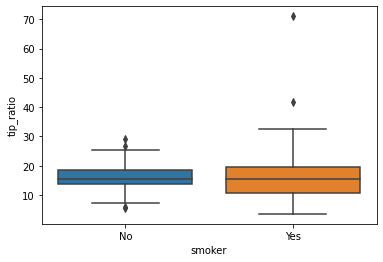

In [ ]:
sns.boxplot(x='smoker', y='tip_ratio', data=df)

## Day

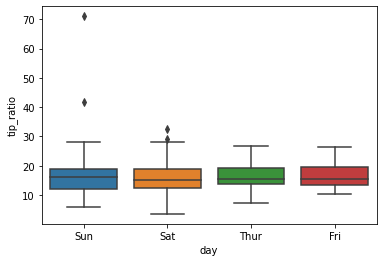

In [ ]:
sns.boxplot(x='day', y='tip_ratio', data=df)

## Time
* Very little diference

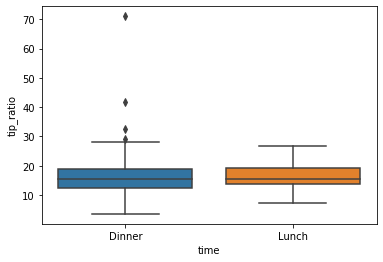

In [ ]:
sns.boxplot(x='time', y='tip_ratio', data=df)

## Party Size
* Visually, single parties have higher tip ratios

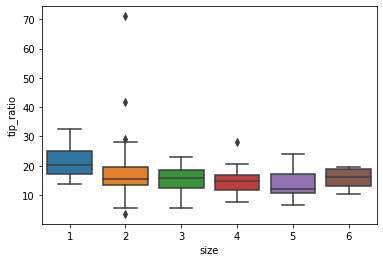

In [ ]:
sns.boxplot(x='size', y='tip_ratio', data=df)

# Cross-Tabs

## Party Size & Gender

In [ ]:
cross_df = df.copy()
cross_df['size'] = cross_df['size'].astype('object')
pd.crosstab(index=cross_df['size'], 
            columns=cross_df.sex, 
            values=cross_df.tip_ratio, 
            aggfunc='mean')

sex,Female,Male
size,,
1,21.513061,22.377622
2,17.082992,16.269448
3,15.989858,14.764085
4,13.273446,15.019654
5,17.219430,13.382079
6,16.289124,14.956716


## Smoking & Gender
* Female smokers have higher tip ratios

In [ ]:
cross_df = df.copy()
pd.crosstab(index=cross_df.smoker, 
            columns=cross_df.sex, 
            values=cross_df.tip_ratio, 
            aggfunc='mean')

sex,Female,Male
smoker,,
No,15.692097,16.066872
Yes,18.215035,15.277118


## Day of Week & Time
* No data for weekend lunches
* Could be features to create - weekday / weekend

In [ ]:
cross_df = df.copy()
pd.crosstab(index=cross_df.day, 
            columns=cross_df.time, 
            values=cross_df.tip_ratio, 
            aggfunc='mean')

time,Dinner,Lunch
day,,
Fri,15.891611,18.876489
Sat,15.315172,NaN
Sun,16.689729,NaN
Thur,15.974441,16.130074
